In [2]:
from numpy import *
from matplotlib.pyplot import *

from scipy.special import erfc, erfcinv

In [114]:
Q = lambda x: 0.5*erfc(x/sqrt(2))
Qinv = lambda x: sqrt(2)*erfcinv(2*x)

# PPM Hard Decision Decoding (HDD)
mu0, mu1 = 0, 1, 
s0, s1 = 0.11*mu1, 0.11*mu1

SER = lambda r, M: (1 - Q((r-mu1)/s1) * ( 1 - Q((r-mu0)/s0) )**(M-1)) 
BER = lambda r, M: SER(r,M) * 0.5*M/(M-1) 

# Threshold for PPM HDD (aproximación)
def thr(M):
    if s0 == s1:
        return (mu0+mu1)/2 + s1**2/(mu1-mu0)*log(M-1)
    else:
        return 1/(s1**2-s0**2)*(mu0*s1**2-mu1*s0**2 + s0*s1*sqrt((mu1-mu0)**2+2*(s1**2-s0**2)*log(s1/s0*(M-1))))

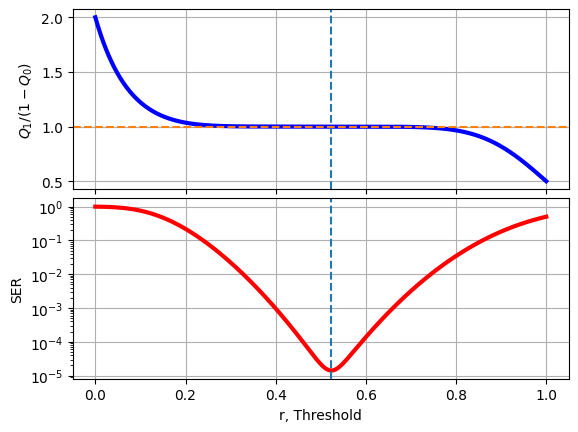

In [115]:
r = linspace(mu0, mu1, 1000)
M = 8

ax = subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [1,1], 'hspace': 0.05})[1]
# plot(r, 1-Q((r-mu1)/s1))
# plot(r, Q((r-mu0)/s0))
ax[0].plot(r, Q((r-mu1)/s1)/(1-Q((r-mu0)/s0)), lw=3, c='b')
ax[0].axvline(thr(M), color='C0', linestyle='--')
ax[0].axhline(1, color='C1', linestyle='--')

ax[1].semilogy(r, SER(r, M), lw=3, c='r')
ax[1].axvline(thr(M), color='C0', linestyle='--')
# axhline(1e-1, color='C1', linestyle='--')

xlabel('r, Threshold')
ax[0].set_ylabel(r'$Q_1/(1-Q_0)$')
ax[1].set_ylabel('SER')
ax[0].grid()
grid()
savefig('SER.pdf') 